## Business Case:- 
* The Satellite Image Classification system leverages the power of deep learning to automatically categorize high-resolution satellite imagery into meaningful land cover types such as urban, forest, water bodies, and agricultural areas. This AI-driven solution is designed to assist government agencies, environmental organizations, and urban planners in monitoring land use changes, detecting deforestation, tracking urban sprawl, and optimizing agricultural practices. By automating the classification process, the model significantly reduces manual effort, improves accuracy, and enables real-time decision-making. The deployment of this system via a user-friendly Streamlit interface ensures accessibility for non-technical users, making it an ideal tool for scalable geospatial intelligence across sectors like climate monitoring, disaster response, infrastructure development, and smart city planning.

In [1]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_shape_2D = (224,224)
input_shape_3D = (224,224,3)
batch_size = 60
seed = 1
epochs = 30

In [3]:
data_ds = tf.keras.utils.image_dataset_from_directory(
    directory="D:\Data Scientist\Data Science\Data Science Internship Project\Intership Extra Projects\Setelight Image Classification System\Images",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode = "rgb",
    batch_size=None,
    image_size=input_shape_2D,
    seed = seed
)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Dell\AppData\Local\Temp\ipykernel_12816\462761514.py:2: SyntaxWarning: invalid escape sequence '\D'
  directory="D:\Data Scientist\Data Science\Data Science Internship Project\Intership Extra Projects\Setelight Image Classification System\Images",


Found 5631 files belonging to 4 classes.


In [4]:
class_name = data_ds.class_names
print(class_name)

['cloudy', 'desert', 'green_area', 'water']


In [5]:
def show_image(images,labels):
    fig,axes = plt.subplots(10,6,figsize=(10,10))
    axes = axes.flatten()
    for i, (img,label) in enumerate(zip(images,labels)):
        axes[i].imshow(img.numpy().astype("uint8"))
        axes[i].set_title(f"label: {label}")
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()

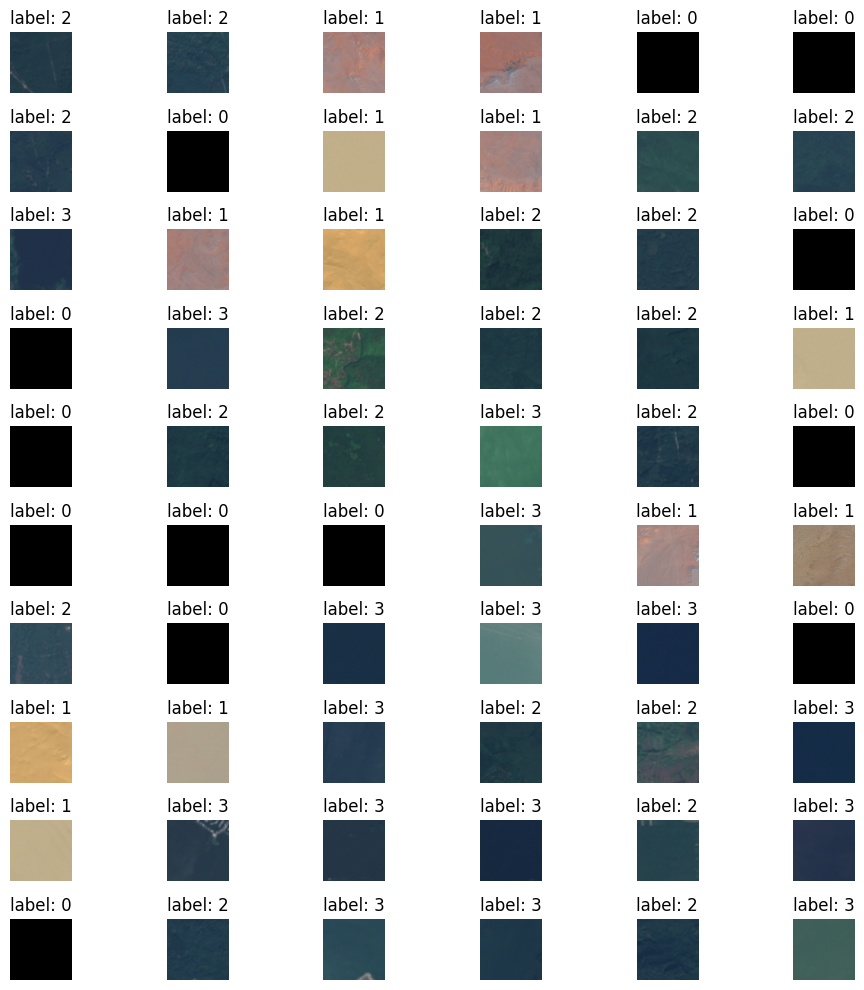

In [6]:
batched_ds = data_ds.batch(batch_size)

batch = next(iter(batched_ds))
images,labels = batch

images,labels = next(iter(batched_ds))
show_image(images,labels)

In [7]:
x = []
y = []

for images,labels in data_ds.batch(2000):
    for img,labels in zip(images,labels):
        x.append(img)
        y.append(labels.numpy())

In [8]:
print(images.shape)

(1631, 224, 224, 3)


In [9]:
x = np.array(x)
y = np.array(y)

In [10]:
(x_train,x_test) = x[:4500],x[4500:]
(y_train,y_test) = y[:4500],y[4500:]

In [11]:
print(x_train.shape)

(4500, 224, 224, 3)


In [12]:
print(x_test.shape)

(1131, 224, 224, 3)


In [13]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [14]:
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = len(class_name))
y_test = to_categorical(y_test, num_classes = len(class_name))

In [15]:
print(x_train.shape[0])
print(x_test.shape[0])

4500
1131


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

model = Sequential()

model.add(Conv2D(16, (3,3), padding='same', strides=1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=3))

model.add(Conv2D(32, (3,3), padding='same', strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=3))

model.add(Conv2D(64, (3,3), padding='same', strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=3))

model.add(Conv2D(128, (3,3), padding='same', strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=3))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Show the model summary
model.summary()

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 74, 74, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 250)                 │         128,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251,194 (981.23 KB)

 Trainable params: 251,194 (981.23 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [18]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="Satelight.keras", 
    save_best_only=True,
    monitor="val_loss"
)

In [19]:
model.fit(x_train,y_train,batch_size=60,epochs=20,validation_data=(x_test,y_test),callbacks=[checkpoint],verbose=1)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 407ms/step - accuracy: 0.5185 - loss: 0.8930 - val_accuracy: 0.7507 - val_loss: 0.3641
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.8025 - loss: 0.3483 - val_accuracy: 0.9054 - val_loss: 0.2547
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 244ms/step - accuracy: 0.8662 - loss: 0.2736 - val_accuracy: 0.9160 - val_loss: 0.1848
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 234ms/step - accuracy: 0.9209 - loss: 0.1859 - val_accuracy: 0.9275 - val_loss: 0.1598
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 238ms/step - accuracy: 0.9025 - loss: 0.2074 - val_accuracy: 0.9319 - val_loss: 0.1672
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 242ms/step - accuracy: 0.9264 - loss: 0.1615 - val_accuracy: 0.9302 - val_loss: 0.1618
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 252ms/step - accuracy: 0.9313 - loss: 0.1526 - val_accuracy: 0.9319 - val_loss: 0.1356
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 244ms/step - accuracy: 0.9349 - loss: 0.1437 - val_accu

In [20]:
y_hat = model.predict(x_test)

classes = ['cloudy', 'desert', 'green_area', 'water']

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


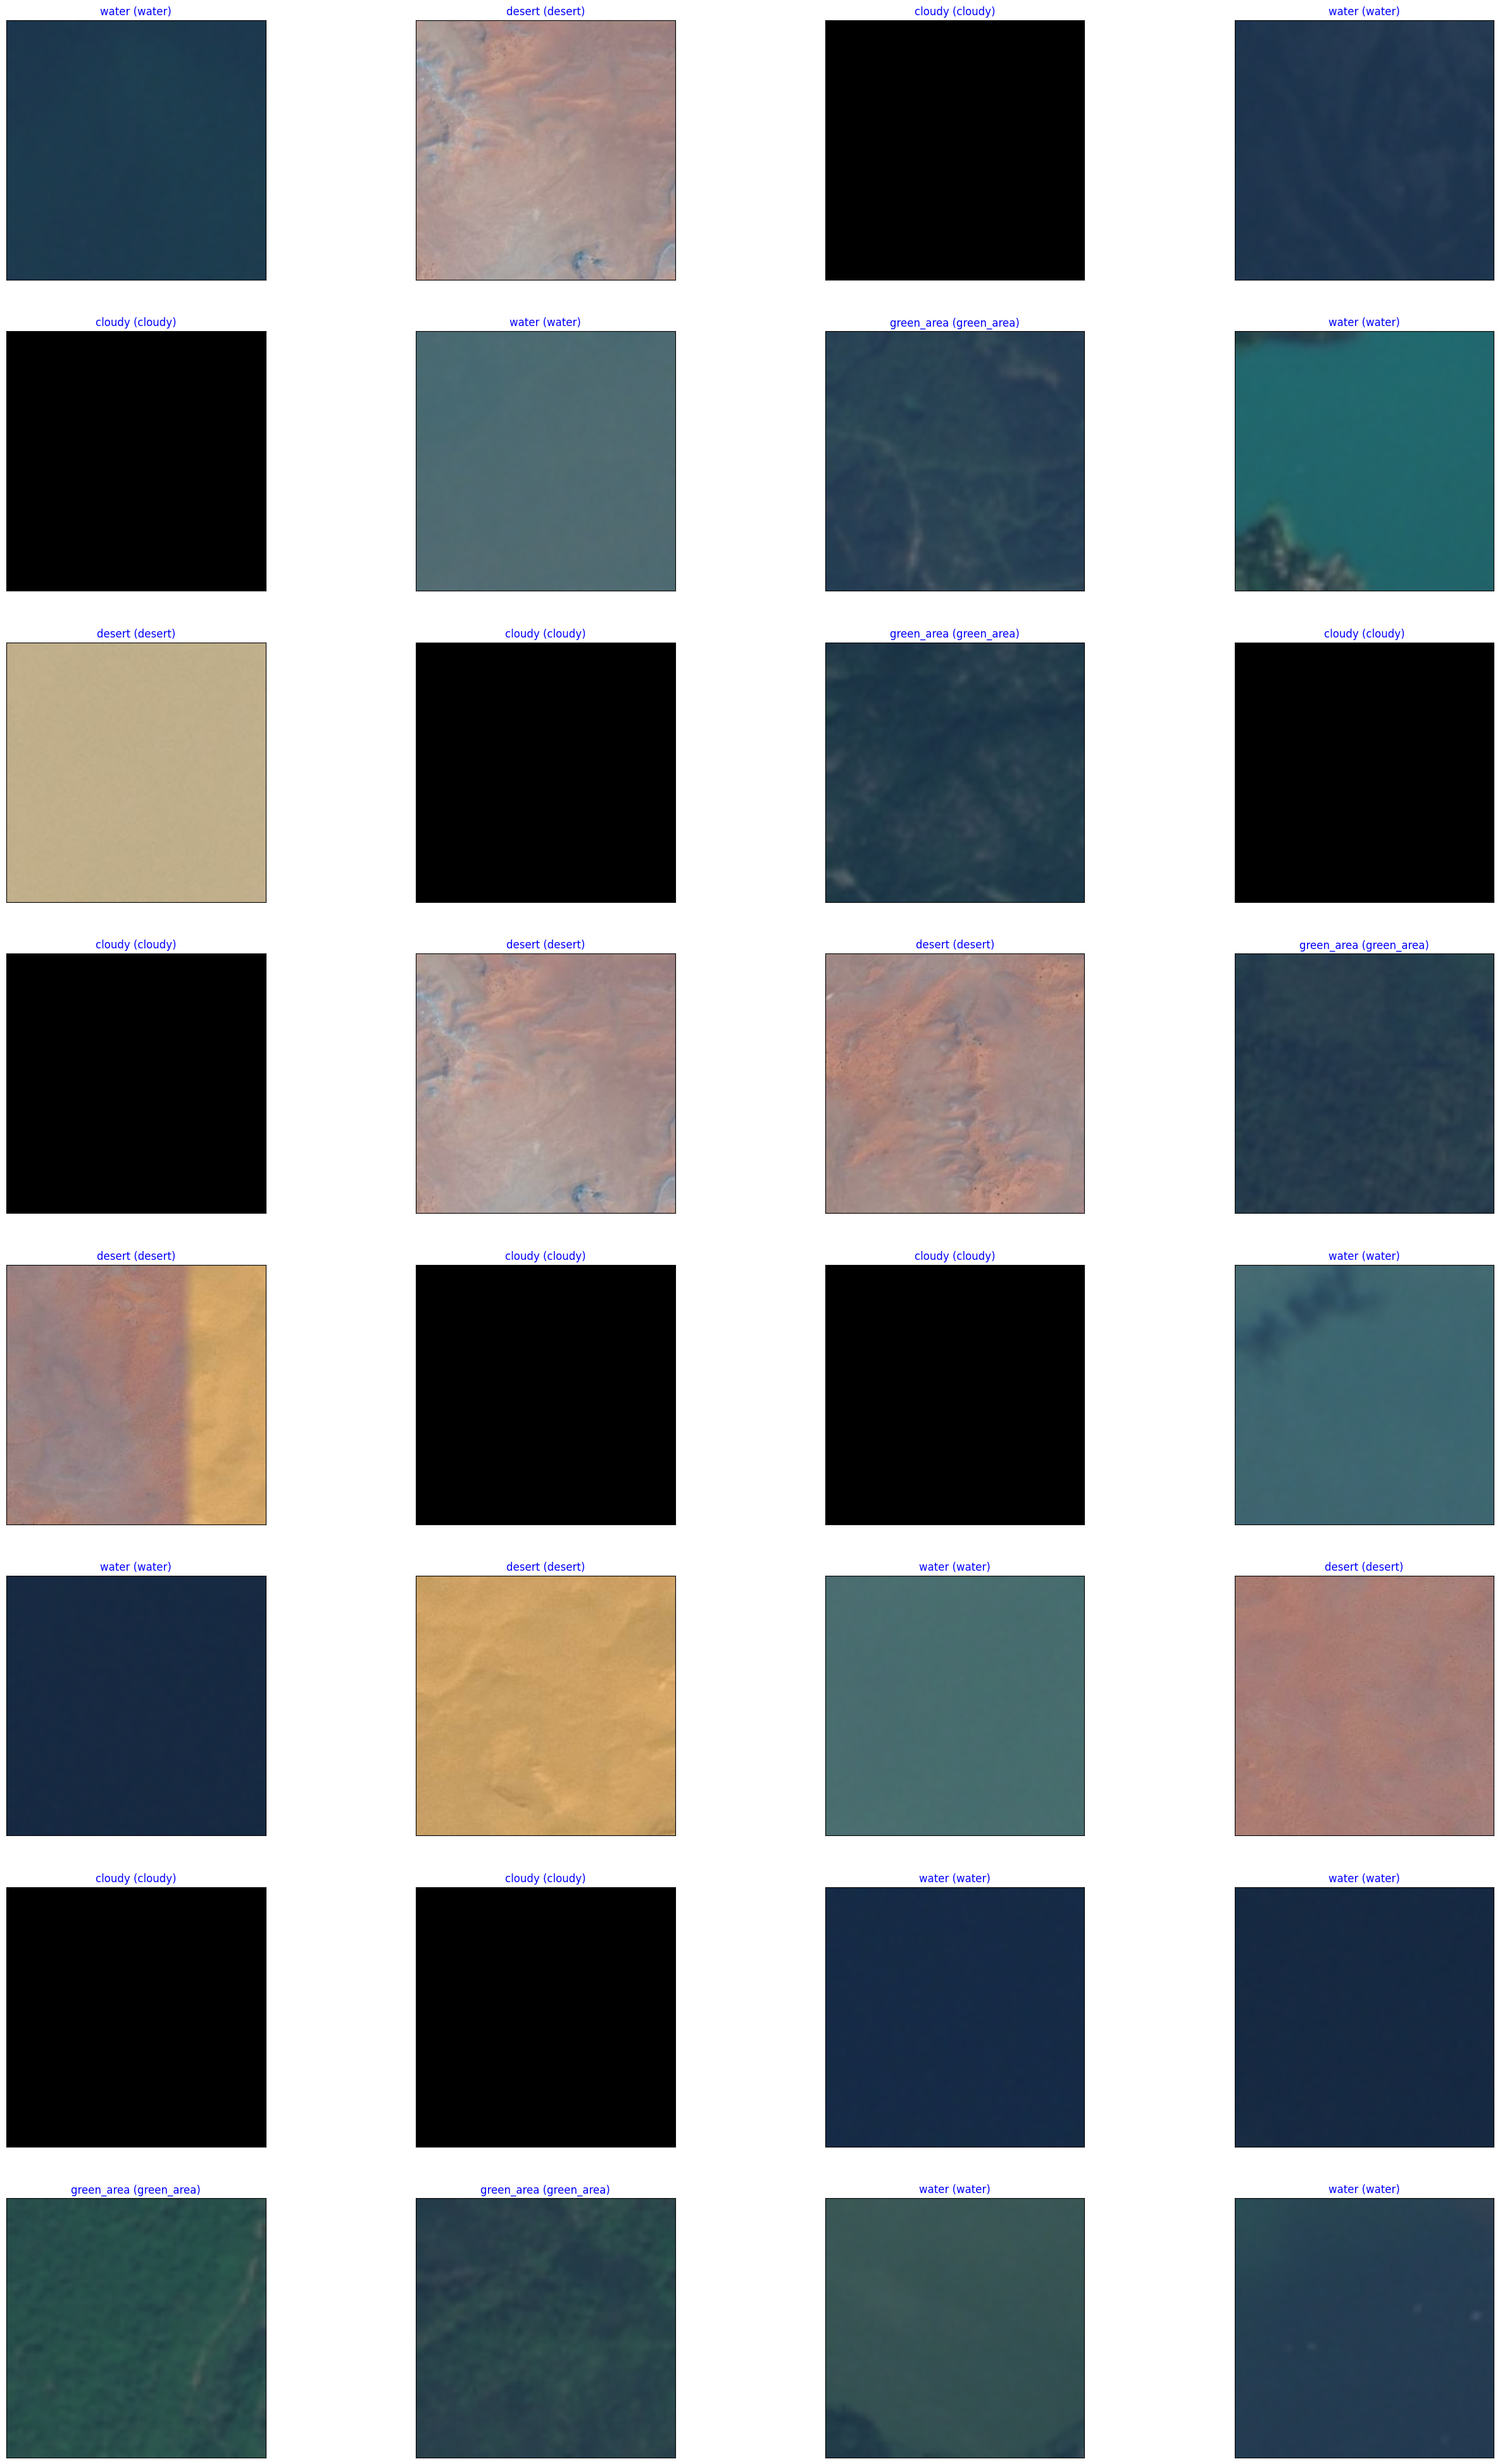

In [22]:
fig = plt.figure(figsize=(32, 50))
for i, idx in enumerate(np.random.choice(len(x_test), size=32, replace=True)):
    ax = fig.add_subplot(8, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]), cmap='gray')  # Optional: Add cmap if grayscale
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title(f"{classes[pred_idx]} ({classes[true_idx]})", 
                 color=("blue" if pred_idx == true_idx else "red"))

In [23]:
score = model.evaluate(x_test,y_test,verbose=True)
accuracy = 100*score[1]
print(accuracy)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9795 - loss: 0.0522
97.61273264884949
